<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts1.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts2.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts3.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts4.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts5.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts6.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts7.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts8.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts9.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts10.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts11.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts12.PNG?raw=true">
<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts13.PNG?raw=true">
for each round we take a pioint from the distribution randomly and pick the bandit that gives highest return.now get the actual value of the real world.if there is a differece then we adjust the distribution to match the real world.continue with the next rounds.so as the samples increases the distribution will be more adjusted to real world.


<img src="https://github.com/ProgramSKAN/Sample-Data-For-Machine-Learning/blob/master/ts14.PNG?raw=true">

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ProgramSKAN/Sample-Data-For-Machine-Learning/master/Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d #no of times Ad i got reward 1
numbers_of_rewards_0 = [0] * d #no of times Ad i got reward 0
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

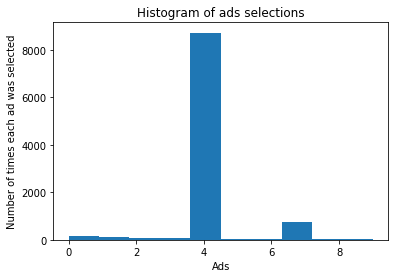

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

unlike upper confidence bound algorithm thompson sampling give bettwe results even at lower number of rounds say N=500.